# Healthcare Final Project
- Darshil Desai, Edwin Ramirez, Rashi Saxena

(D combined weith r)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import f_classif, chi2, SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, make_scorer,roc_auc_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# 1. Project Overview

In this project we dive deep into the depths of the healthcare dataset and explore insightful relationships between the different types of data provided and pursue building predictive models


[ ADD STUFF ]

We will be predicting: 
- Regression: Predict post_medical_cost
- Classifications - Logistic, KNN and NB: to predict pdc_80_flag

# 2. Exploring the Dataset

Before we dive deeper into model building, we need to explore our dataset. [ADD MORE]


In [3]:
# Reading in the data file
data = pd.read_csv('projectTrain.csv')
data.head()

,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,post_ip_flag,...,generic_cost,brand_cost,ratio_G_total_cost,numofgen_post,numofbrand_post,generic_cost_post,brand_cost_post,ratio_G_total_cost_post,pdc_80_flag,drug_class
0,0.333333,0,0,4,0,15,5,14.466667,0.101382,0,...,30.621563,2984.927229,0.010155,2,13,196.359216,3001.501507,0.061403,0,*ANTIDIABETICS*
1,0.866667,0,0,5,0,16,4,18.000000,0.888889,0,...,720.788173,0.000000,1.000000,14,2,671.755173,735.661568,0.477297,1,*ANTIDIABETICS*
2,0.938889,0,0,7,0,11,4,8.600000,1.000000,0,...,179.538533,0.000000,1.000000,11,0,171.446621,0.000000,1.000000,1,*ANTICOAGULANTS*
3,0.077778,1,12,40,0,5,5,2.033333,1.000000,1,...,105.816329,0.000000,1.000000,5,0,335.826436,0.000000,1.000000,0,*ANTICOAGULANTS*
4,0.444444,0,0,12,1,15,9,14.833333,0.528090,0,...,630.173638,3265.595950,0.161758,8,7,75.988845,2054.400835,0.035669,0,*ANTIDIABETICS*


In [4]:
# Taking a look at the data dimensions
print ('This dataset has {} records and {} features'.format(data.shape[0], data.shape[1]))

This dataset has 2000 records and 94 features


In [5]:
# Features in focus
print ('Predictor variable for the regression problem: post_medical_cost & for the classification problem: pdc_80_flag' )

Predictor variable for the regression problem: post_medical_cost & for the classification problem: pdc_80_flag


### 2.1) Visual Analysis : Taking a look at our predictor variables

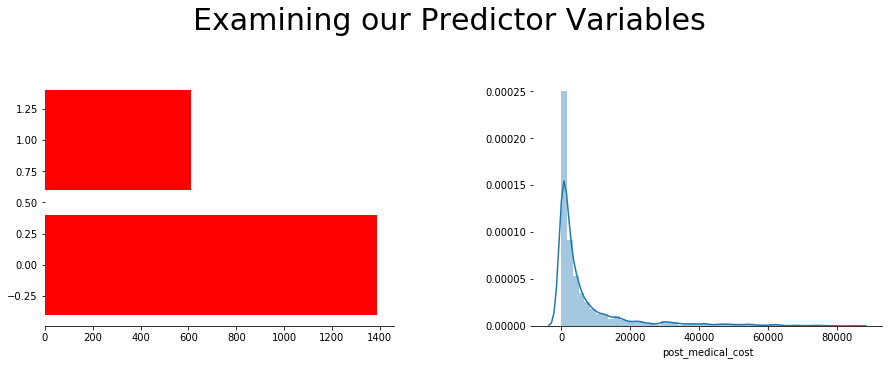

In [6]:
# Taking a look at our predictor variables

plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.suptitle('Examining our Predictor Variables', fontsize=30)

#-------------------------------------------

# Plotting the predictor variable to convey class balance or imbalance
plt.subplot(2,2,1)

a = pd.DataFrame(data.groupby(data.pdc_80_flag)['pdc_80_flag'].count())
plt.barh(list(a.index),a.pdc_80_flag, color = 'red')

#-------------------------------------------
# Plotting the predictor variable to convey class balance or imbalance
plt.subplot(2,2,2)
sns.distplot(data['post_medical_cost'], label="Actual High")

sns.despine(left=True)

### 2.ii) Manually selecting a broad range of relevant independant variables

In this section we will subset the dataframe and select the features we deem appropriate to further this analysis. Note that these features are not final and among these features there will be several that will not be selected for the machine learning models. In the "Feature Selection" section of this project, we will employ the use of various statistical techniques to determine the appropriateness of the same. 

In [7]:
""" Subsetting the dataset to account for diabetic patients only """

data1 = data[data['drug_class'].str.contains('ANTIDIABETIC')]
data1.head(2)

,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,post_ip_flag,...,generic_cost,brand_cost,ratio_G_total_cost,numofgen_post,numofbrand_post,generic_cost_post,brand_cost_post,ratio_G_total_cost_post,pdc_80_flag,drug_class
0,0.333333,0,0,4,0,15,5,14.466667,0.101382,0,...,30.621563,2984.927229,0.010155,2,13,196.359216,3001.501507,0.061403,0,*ANTIDIABETICS*
1,0.866667,0,0,5,0,16,4,18.000000,0.888889,0,...,720.788173,0.000000,1.000000,14,2,671.755173,735.661568,0.477297,1,*ANTIDIABETICS*


In [8]:
"""Creating the Continous variables"""
first_cont = data1.iloc[:,0:19]
other_cont = data1.iloc[:,62:92]

cont_features = pd.concat([first_cont,other_cont ],axis=1)
cont_features.head()


,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,post_ip_flag,...,numofgen,numofbrand,generic_cost,brand_cost,ratio_G_total_cost,numofgen_post,numofbrand_post,generic_cost_post,brand_cost_post,ratio_G_total_cost_post
0,0.333333,0,0,4,0,15,5,14.466667,0.101382,0,...,2,13,30.621563,2984.927229,0.010155,2,13,196.359216,3001.501507,0.061403
1,0.866667,0,0,5,0,16,4,18.000000,0.888889,0,...,17,0,720.788173,0.000000,1.000000,14,2,671.755173,735.661568,0.477297
4,0.444444,0,0,12,1,15,9,14.833333,0.528090,0,...,9,11,630.173638,3265.595950,0.161758,8,7,75.988845,2054.400835,0.035669
15,0.900000,0,0,7,0,37,12,36.000000,0.627778,0,...,16,14,452.943021,3239.094592,0.122681,25,12,376.675746,5461.857232,0.064515
17,0.500000,0,0,2,0,13,4,11.500000,0.478261,0,...,6,0,165.140283,0.000000,1.000000,7,6,360.222309,1881.925575,0.160659


In [9]:
cont_features.columns

Index(['pdc', 'num_ip_post', 'total_los_post', 'num_op_post', 'num_er_post',
       'num_ndc_post', 'num_gpi6_post', 'adjust_total_30d_post',
       'generic_rate_post', 'post_ip_flag', 'post_er_flag', 'pdc_cat',
       'post_ip_cost', 'post_er_cost', 'post_rx_cost', 'post_op_cost',
       'post_total_cost', 'post_medical_cost', 'idx_copay', 'pre_er_cost',
       'pre_rx_cost', 'pre_op_cost', 'pre_total_cost', 'pre_medical_cost',
       'num_ip', 'total_los', 'num_op', 'num_er', 'num_ndc', 'num_gpi6',
       'adjust_total_30d', 'generic_rate', 'pre_ip_flag', 'pre_er_flag',
       'log_pre_ip_cost', 'log_pre_er_cost', 'log_pre_op_cost',
       'log_pre_rx_cost', 'pre_total_cat', 'numofgen', 'numofbrand',
       'generic_cost', 'brand_cost', 'ratio_G_total_cost', 'numofgen_post',
       'numofbrand_post', 'generic_cost_post', 'brand_cost_post',
       'ratio_G_total_cost_post'],
      dtype='object')

In [10]:
# chekcing dimensions of the continous variables
cont_features.shape

(965, 49)

In [11]:
"""Creating our categorical variables"""

all_diseases = data1.iloc[:,26:61]
othercats = data1.iloc[:,19:22]

cat_features = pd.concat([all_diseases,othercats ],axis=1)
cat_features.head(2)

,ALCOHOL_DRUG,ASTHMA,CARDIAC_ARRYTHMIA,CARDIAC_VALVULAR,CEREBROVASCULAR,CHRONIC_KIDNEY,CHRONIC_PAIN_FIBRO,CHF,COPD,DEMENTIA,...,THYROID,Solid_Tumor,Metastatic,Leukemia_Lymphoma,Other_Cancer,Cancer_In_Situ,pre_CCI,age_grpN,sexN,regionN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,3


In [12]:
cat_features.shape

(965, 38)

### 2.iii) Examining the variables

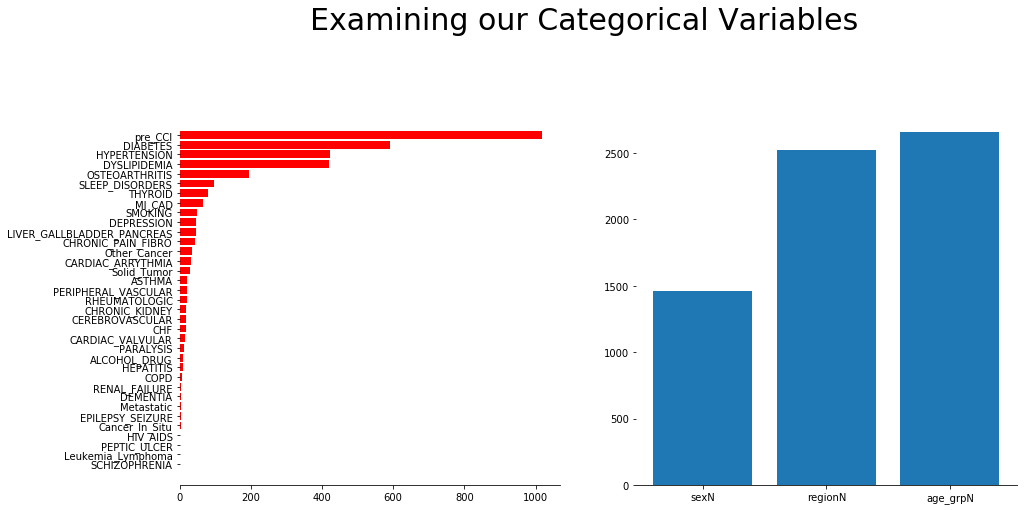

In [13]:

plt.figure(figsize=(15,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.suptitle('Examining our Categorical Variables', fontsize=30)

#-------------------------------------------

# Plotting the predictor variable to convey class balance or imbalance
# Taking a look at our categorical variables
plt.subplot(2,2,1)

z = pd.DataFrame(all_diseases.sum())
z.columns = ['counts']
z = z.sort_values('counts',ascending=True)
plt.barh(z.index, z.counts, color = 'red')

#-------------------------------------------

# Plotting the predictor variable to convey class balance or imbalance
# Taking a look at our categorical variables
plt.subplot(2,2,2)

z1 = pd.DataFrame(othercats.sum())
z1.columns = ['counts']
z1 = z1.sort_values('counts',ascending=True)
plt.bar(z1.index, z1.counts)


sns.despine(left=True)


In [14]:
# Add more eda

# 3. Feature Selection - Regression

## a. Collinearity Tests

In this section we will employ the use of a correlation matrix to determine the following: 

**- (i.) Multicollinearity: ** Determine whether the continous independent variables, which we will use to predict both the **post_medical_cost** posed as a regression problem, are independent of one another. Given the high dimensionality of our dataset, it is completely plausible for features to correlate with one another and moving forward without fixing this phenomenon will render the predictive model inaccurate and irrelevant

**- (ii.)** Determine whether there exists a significant collinearity between the feature set and the variable we are trying to predict. In simple works, this allows us to answer to confirm that there indeed lies some type of "relationship" between what we are trying to predict and what we are using to predict!

###  a.i ) Multicollinearity

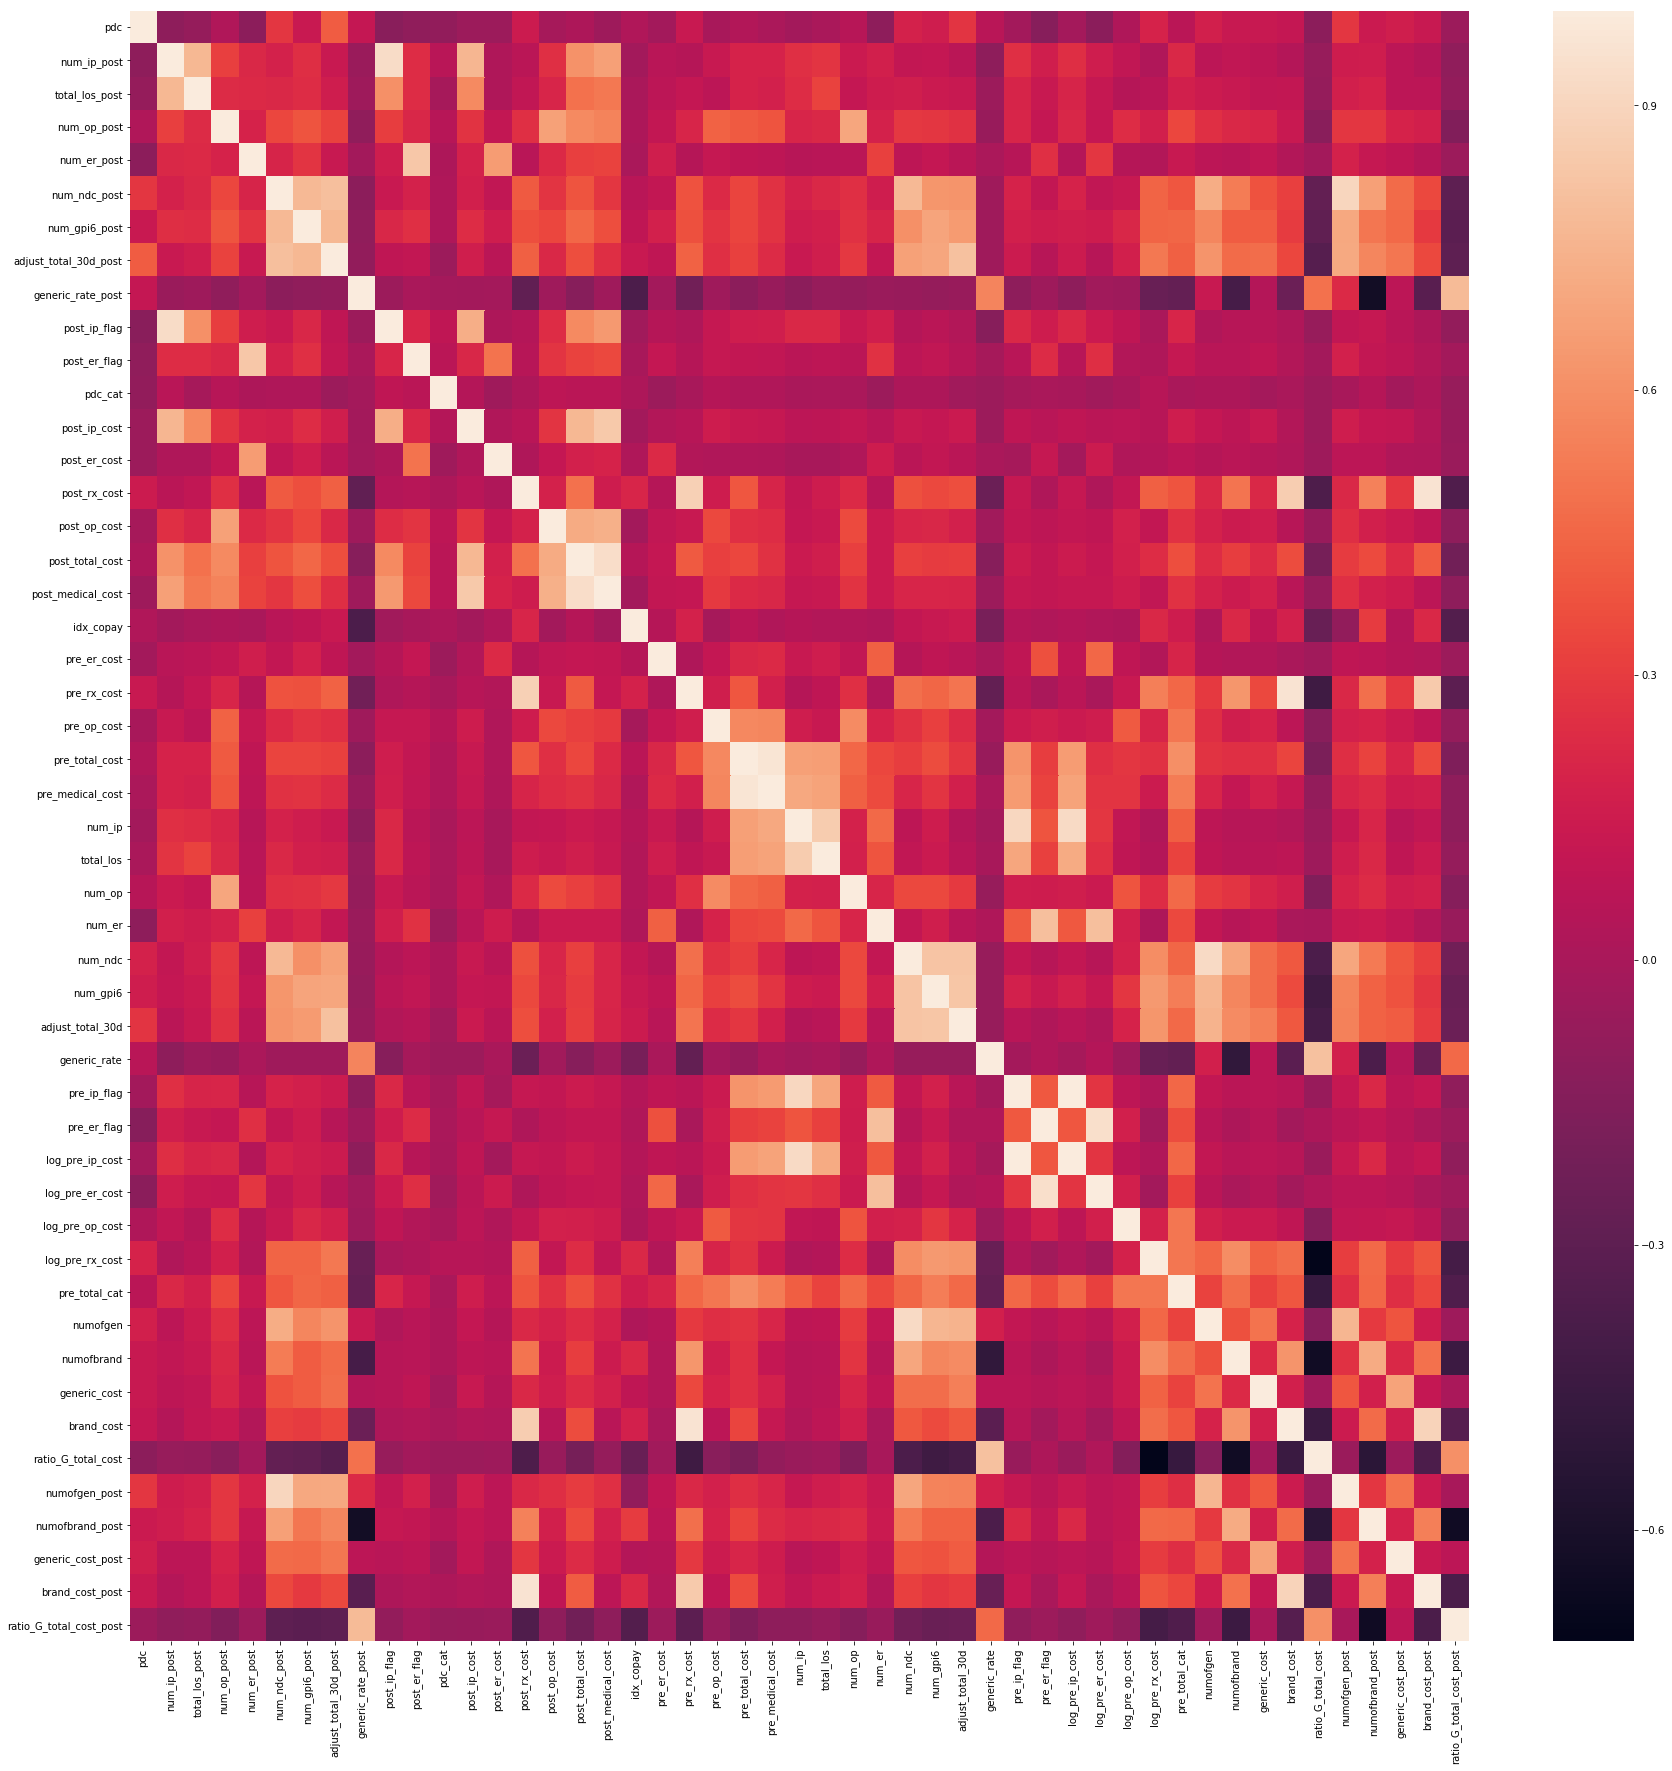

In [15]:
plt.figure(figsize=(30,30))
corr = cont_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values) ;

**Next,** lets observe the above phenomenon numerically. Given below are the R^2 values that allow us to see how well numerical values correlate with one another. Recall that a good set of features are independent of one another

In [16]:
cor_matrix = cont_features.corr()
cor_matrix.head(5)

,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,post_ip_flag,...,numofgen,numofbrand,generic_cost,brand_cost,ratio_G_total_cost,numofgen_post,numofbrand_post,generic_cost_post,brand_cost_post,ratio_G_total_cost_post
pdc,1.000000,-0.106475,-0.075723,0.030407,-0.109407,0.276333,0.130724,0.413026,0.112727,-0.120531,...,0.170815,0.126412,0.121200,0.108894,-0.111559,0.275829,0.139305,0.161472,0.123346,-0.052033
num_ip_post,-0.106475,1.000000,0.770752,0.311733,0.215536,0.187301,0.248025,0.134124,-0.053776,0.927521,...,0.077533,0.098496,0.082418,0.045820,-0.071916,0.148399,0.157717,0.075350,0.042039,-0.097287
total_los_post,-0.075723,0.770752,1.000000,0.232897,0.222426,0.221166,0.240501,0.155422,-0.044207,0.609454,...,0.141358,0.126799,0.098295,0.101653,-0.075076,0.171216,0.193183,0.077214,0.074231,-0.081923
num_op_post,0.030407,0.311733,0.232897,1.000000,0.190338,0.341323,0.389001,0.322859,-0.094542,0.306401,...,0.252106,0.219554,0.202461,0.129681,-0.120569,0.277008,0.277568,0.190811,0.170766,-0.160059
num_er_post,-0.109407,0.215536,0.222426,0.190338,1.000000,0.197873,0.272044,0.121653,-0.021295,0.160111,...,0.079915,0.060880,0.095117,0.037075,-0.023655,0.184536,0.119693,0.092611,0.048037,-0.050703


In [17]:
# Upper triangle of correlation matrix
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
upper.head(5)

# In feature columns with correlation greater than selected corr strengh
to_drop = [column for column in upper.columns if any(upper[column]> 0.9) if column != 'post_medical_cost' ]
to_drop

# Selecting all features that do are NOT highly correlated
cont_variable_columns = [x for x in cont_features.columns if x not in to_drop]

In [18]:
# Dataframe consisting of continous features ready to be used into our analysis
cont_features_uncorrelated =  cont_features[cont_variable_columns]

In [19]:
# Finally these are the uncorrelated features to use
cont_features_uncorrelated.head(2)

,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,post_er_flag,...,pre_er_flag,log_pre_op_cost,log_pre_rx_cost,pre_total_cat,numofbrand,generic_cost,ratio_G_total_cost,numofbrand_post,generic_cost_post,ratio_G_total_cost_post
0,0.333333,0,0,4,0,15,5,14.466667,0.101382,0,...,0,7.394045,8.011537,7,13,30.621563,0.010155,13,196.359216,0.061403
1,0.866667,0,0,5,0,16,4,18.000000,0.888889,0,...,0,6.172430,6.580345,4,0,720.788173,1.000000,2,671.755173,0.477297


### a. ii ) Collinearity with the regression predictor variable

In [20]:
# Correlation matrix between continous features only
cor_matrix_cont_features = cont_features_uncorrelated.corr()
cor_matrix_cont_features.head(5)

,pdc,num_ip_post,total_los_post,num_op_post,num_er_post,num_ndc_post,num_gpi6_post,adjust_total_30d_post,generic_rate_post,post_er_flag,...,pre_er_flag,log_pre_op_cost,log_pre_rx_cost,pre_total_cat,numofbrand,generic_cost,ratio_G_total_cost,numofbrand_post,generic_cost_post,ratio_G_total_cost_post
pdc,1.000000,-0.106475,-0.075723,0.030407,-0.109407,0.276333,0.130724,0.413026,0.112727,-0.097388,...,-0.128981,0.023634,0.194652,0.068091,0.126412,0.121200,-0.111559,0.139305,0.161472,-0.052033
num_ip_post,-0.106475,1.000000,0.770752,0.311733,0.215536,0.187301,0.248025,0.134124,-0.053776,0.237602,...,0.167941,0.100860,0.030891,0.216706,0.098496,0.082418,-0.071916,0.157717,0.075350,-0.097287
total_los_post,-0.075723,0.770752,1.000000,0.232897,0.222426,0.221166,0.240501,0.155422,-0.044207,0.238928,...,0.121956,0.053976,0.068929,0.171373,0.126799,0.098295,-0.075076,0.193183,0.077214,-0.081923
num_op_post,0.030407,0.311733,0.232897,1.000000,0.190338,0.341323,0.389001,0.322859,-0.094542,0.210295,...,0.112734,0.241357,0.174004,0.342306,0.219554,0.202461,-0.120569,0.277568,0.190811,-0.160059
num_er_post,-0.109407,0.215536,0.222426,0.190338,1.000000,0.197873,0.272044,0.121653,-0.021295,0.835333,...,0.254340,0.050820,0.039885,0.124978,0.060880,0.095117,-0.023655,0.119693,0.092611,-0.050703


In [21]:
# Selecting the correlation strength as strength of associativity
corr_strength = 0.5

pd.set_option('display.max_rows', 100)
a = cor_matrix_cont_features['post_medical_cost'] >= corr_strength
b = cor_matrix_cont_features['post_medical_cost'][a]
names = [x for x in b.index if x != 'post_medical_cost'] # all 
names

['num_ip_post',
 'total_los_post',
 'num_op_post',
 'post_ip_cost',
 'post_op_cost',
 'post_total_cost']

In [22]:
# Get the names of all columns to finally use for regression

list_len = len(names)

for i in range(list_len):
    
    for j in range(i + 1, list_len):

        print(names[i]+" "+names[j]+ " " + str(cor_matrix[names[i]][names[j]]))
    

num_ip_post total_los_post 0.7707521767746419
num_ip_post num_op_post 0.31173329716115583
num_ip_post post_ip_cost 0.7628602295421479
num_ip_post post_op_cost 0.25190187696735467
num_ip_post post_total_cost 0.6149498964758712
total_los_post num_op_post 0.23289701920163255
total_los_post post_ip_cost 0.5776264793877516
total_los_post post_op_cost 0.20199377180958192
total_los_post post_total_cost 0.48745399883343604
num_op_post post_ip_cost 0.26474435584985073
num_op_post post_op_cost 0.6748393757395469
num_op_post post_total_cost 0.5818165554255155
post_ip_cost post_op_cost 0.2711506440516271
post_ip_cost post_total_cost 0.7692399891809906
post_op_cost post_total_cost 0.7157302919167251


In [23]:
# All continous features to use for the regression model
final_reg = cont_features[names]
final_reg.head()

,num_ip_post,total_los_post,num_op_post,post_ip_cost,post_op_cost,post_total_cost
0,0,0,4,0.0,356.713735,3554.574459
1,0,0,5,0.0,852.413220,2259.829961
4,0,0,12,0.0,15195.119210,18281.763610
15,0,0,7,0.0,1059.870788,6917.049020
17,0,0,2,0.0,224.153814,2466.301698



[EDIT]
From our correlation heatmap, correlation matrix, we can say that num_op_post and post_total_cost are the only two variables that are highly correlated with our predictor variable, post_medical_cost, while not being correlated with the other features.

In [24]:
# stepwise regression - Pending

# 5.i Model Fitting - Regression

In [25]:

"""Data Cleaning & Feature Engineering

- **a.** Normalize the continuous variables
- **b.** Deal with outlier data? Cap it maybe
- **c.** Create new features if necessary

##### Normalizing the data

Here we look to employ the use of Guassian normalization techniques to pull our continuous variables, considering that they are not on the same scale
"""

def normalize(cf):

    scaler = preprocessing.StandardScaler().fit(cf)
    X_scaled = scaler.transform(cf)
    a = pd.DataFrame(X_scaled)
    a.columns = cf.columns
    return a
    

In [38]:
# normalizing features
final_reg_scaled = normalize(final_reg)
final_reg_scaled.head(2)

# setting index
final_reg_scaled.index = final_reg.index
final_reg_scaled.head(5)

C:\Users\Darshil Desai\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Darshil Desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,num_ip_post,total_los_post,num_op_post,post_ip_cost,post_op_cost,post_total_cost
0,-0.280763,-0.184483,-0.392739,-0.221028,-0.484904,-0.242989
1,-0.280763,-0.184483,-0.289189,-0.221028,-0.377369,-0.375410
4,-0.280763,-0.184483,0.435662,-0.221028,2.734099,1.263238
15,-0.280763,-0.184483,-0.082089,-0.221028,-0.332363,0.100909
17,-0.280763,-0.184483,-0.599840,-0.221028,-0.513661,-0.354293


In [40]:
main_data_reg = pd.concat([final_reg_scaled, cat_features], axis=1)
main_data_reg.head(5)

,num_ip_post,total_los_post,num_op_post,post_ip_cost,post_op_cost,post_total_cost,ALCOHOL_DRUG,ASTHMA,CARDIAC_ARRYTHMIA,CARDIAC_VALVULAR,...,THYROID,Solid_Tumor,Metastatic,Leukemia_Lymphoma,Other_Cancer,Cancer_In_Situ,pre_CCI,age_grpN,sexN,regionN
0,-0.280763,-0.184483,-0.392739,-0.221028,-0.484904,-0.242989,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
1,-0.280763,-0.184483,-0.289189,-0.221028,-0.377369,-0.375410,0,0,0,0,...,0,0,0,0,0,0,0,2,1,3
4,-0.280763,-0.184483,0.435662,-0.221028,2.734099,1.263238,0,0,0,0,...,0,0,0,0,0,0,1,3,1,3
15,-0.280763,-0.184483,-0.082089,-0.221028,-0.332363,0.100909,0,0,0,0,...,0,0,0,0,0,0,1,3,1,3
17,-0.280763,-0.184483,-0.599840,-0.221028,-0.513661,-0.354293,0,0,0,0,...,0,0,0,0,0,0,0,3,1,3


In [41]:
# Splitting the dataset into training and validation
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(main_data_reg, data.loc[main_data_reg.index]['post_medical_cost'], test_size=0.20, random_state=42)

In [43]:
# Create linear regression object
regr = LinearRegression()

# Fitting the model
regr.fit(X_train_reg, y_train_reg)

# In sample error
np.sqrt(mean_squared_error(y_train_reg, regr.predict(X_train_reg)))

680.343009639461

In [44]:
# Outsample error:  testing the validation 
np.sqrt(mean_squared_error(y_val_reg, regr.predict(X_val_reg)))

1561.110069759912

#### INTERPRET THE ERRORS

The RMSE or root mean square error allows you to see how much your prediction deviates, on average, from the actual value in the units of the variable

- In sample RMSE of 680: Average deviation in predicted total_medical_cost for the training dataset is $680 (hunderds? - CHECK UNITS)

- Out sample RMSE of 1561: Average deviation in predicted total_medical_cost for the validation dataset is $1561 (hunderds? - CHECK UNITS)


**Next steps:** The stark difference between the train and validation datasets suggests that our model might be overfitting. This calls for additional steps to diminish this effect. Lets explore - [PENDING]


# 3. Feature Selection - Classification


## a. Associativity

This section will focus on determining the which of the appropriate features to incorporate in our model fitting. We will employ the use of various techniques to determine the following: 
    
- **(i.) Which features show significant associativity which the predictor variable we will use for classification. Predicting the pdc_80_flag variable poses as a binary classification problem. 
    - Employ the use of chi-square tests to determine which categorical variables prove to be associative with 
    - Employ the use of the ________ to determine which continuous variables work best in predicting the pdc_80_flag


### (a.i) Chi - Square test

In [45]:
"""Co - morbidity index"""
# First we need to make a contigency table 


def chisq(cat_cols, group, a, df):    
    """
    Calculates the chi-square metric for a set of categorical variables given the group
    
    Parameters
    ----------
    : param cat_cols: The column names of categorica columns in from the data file
    : param group: Aither ANTIDIABETIC or ANTICOAGULANT or BOTH as 'ANTIDIABETIC|ANTICOAGULANT'
    : param a: alpha test statistic
    """
    
    data = df
    
    # Only retreiving rows belonging to the group
    subset_ad = data[data['drug_class'].str.contains(group)]
    
    # Initializing empty lists to append into
    var = []
    p_val = []
    

    # Iterating over each cat_column
    for x in cat_cols:
        
        # Contingency table for that categorical column and the pdc_80_flag
        table = np.array(pd.crosstab(subset_ad[x], subset_ad['pdc_80_flag']))

        # Getting statistical metrics
        stat, p, dof, expected = chi2_contingency(table)
        
        # Append all data
        var.append(x), p_val.append(p)
    
    # Empty dataframe to append into
    mod_df = pd.DataFrame({'variable': var, 'p_val': np.round(p_val,6)})

    # return
    return mod_df[mod_df['p_val'] <= a]          


In [46]:
# Which categorical columns were chosen for Diabetic patients
cat_chosen = chisq(cat_features.columns, 'ANTIDIABETIC', 0.05, df=data1).variable
cat_chosen

11        DIABETES
12    DYSLIPIDEMIA
16    HYPERTENSION
28         THYROID
34         pre_CCI
35        age_grpN
36            sexN
37         regionN
Name: variable, dtype: object

### b.ii Statistical test to choose continous features for classification

In [ ]:
# pending

### (3.b) New Features Maybe?

In [ ]:
# pending

# 5.ii Model Fitting - Classification

Prior to model fitting, we will create the combined dataset and then split it up the training dataset into training and validation sets in order to test for hyperparameters

In [73]:
# categorical features for classification
cat_features_classification = cat_features[cat_chosen]
cat_features_classification.index = cont_features.index

# cont features fr classification
cont_features_classification = normalize(cont_features)
cont_features_classification.index = cont_features.index

C:\Users\Darshil Desai\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Darshil Desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [74]:
"""Combined dataset"""
main_x = pd.concat([cont_features_classification, cat_features_classification], axis=1)
main_x.shape

(965, 57)

In [87]:
main_x.head()
main_x = main_x.dropna()

In [88]:
data1['pdc_80_flag'].shape

(965,)

In [90]:
# Splitting the dataset into training and validation
X_train, X_val, y_train, y_val = train_test_split(main_x, data1.loc[list(main_x.index)]['pdc_80_flag'], test_size=0.20, random_state=42)

In [91]:
def return_accu_report(Xval, yval,Xtrain,ytrain, model):
    """
    returns the in and out sample accuracy rates
    """
    preds_log = model.predict(X_val)
    
    # In sample---------------------------
    # Accuracy
    in_sample_accuracy = round(accuracy_score(ytrain ,model.predict(Xtrain)),2) *100
    # Testing
    print ('The in sample accuracy score using this classifier: {} %'.format(in_sample_accuracy))

    
    
    # Out sample ----------------------
    out_preds = model.predict(Xval)
    
    # Accuracy
    out_sample_accu = round(accuracy_score(yval ,out_preds),2) *100
    # Testing
    print ('The out sample accuracy score using this classifier: {} %'.format(out_sample_accu))

    
    # Confusion matrix for the out sample
    print ('Confusion Matrix: \n' ,confusion_matrix(y_val , out_preds))

### 5.1) Classification Using Naive Bayes 

In this section we will employ the use of the Naive Bayes Classifer to predict the pdc_80_flag. Particularily:

- Categorical features used: DIABETES, DYSLIPIDEMIA, HYPERTENSION, THYROID, age_grpN, sexN, regionN
- Continous features used: All for now (will delete later after the statistical section above is filled)

In [92]:
X_train.shape

(729, 57)

In [94]:
#Create a Gaussian Classifier
nb_model = GaussianNB()

# Fitting the Model
nb_model.fit(X_train,y_train)

return_accu_report(X_val, y_val,X_train, y_train, nb_model)    

The in sample accuracy score using this classifier: 99.0 %
The out sample accuracy score using this classifier: 98.0 %
Confusion Matrix: 
 [[104   0]
 [  3  76]]


### 5.2) Logistic Regression

In this section we will employ the use of the Logistic Regression Classifer to predict the pdc_80_flag. Particularily:

- Categorical features used: DIABETES, DYSLIPIDEMIA, HYPERTENSION, THYROID, age_grpN, sexN, regionN
- Continous features used: All for now (will delete later after the statistical section above is filled)

In [95]:
# creating an instance of the model AND fitting it 
log_model = LogisticRegression(random_state=0, penalty="l2", max_iter = 1000, solver = 'lbfgs')

# Fitting the Model
log_model.fit(X_train,y_train)

return_accu_report(X_val, y_val,X_train, y_train, log_model)    

The in sample accuracy score using this classifier: 100.0 %
The out sample accuracy score using this classifier: 100.0 %
Confusion Matrix: 
 [[104   0]
 [  0  79]]


### 5.3) KNN

In this section we will employ the use of the KNN to predict the pdc_80_flag. Particularily:

- Categorical features used: DIABETES, DYSLIPIDEMIA, HYPERTENSION, THYROID, age_grpN, sexN, regionN
- Continous features used: All for now (will delete later after the statistical section above is filled)

In [96]:
# Initializing the model
neigh = KNeighborsClassifier(n_neighbors=3, weights = 'distance')

# fitting the model 
neigh.fit(X_train, y_train)

return_accu_report(X_val, y_val,X_train, y_train, neigh)    

The in sample accuracy score using this classifier: 100.0 %
The out sample accuracy score using this classifier: 77.0 %
Confusion Matrix: 
 [[84 20]
 [22 57]]
